# Team_Project

In [1]:
setwd('D:/workspace/R_Practice/data/R_data')

In [2]:
getwd()

[1] "D:/workspace/R_Practice/data/R_data"

In [3]:
library('dplyr')
library('ggplot2')
library('car')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode



In [4]:
data = read.csv('sales_data_1.csv')
head(data)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,과즙음료,45,990,2611,4,126753,151,12
2,200902,과즙음료,45,1199,2689,9,113399,3014,8
3,200903,과즙음료,43,1102,2735,12,129162,1383,9
4,200904,과즙음료,42,1326,2807,19,126277,3564,8
5,200905,과즙음료,46,1672,2674,25,129584,9288,12
6,200906,과즙음료,48,1875,2777,27,123218,9998,8


In [5]:
str(data)

'data.frame':	180 obs. of  10 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ YM      : int  200901 200902 200903 200904 200905 200906 200907 200908 200909 200910 ...
 $ CATEGORY: Factor w/ 3 levels "과즙음료","비타민음료",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ITEM_CNT: int  45 45 43 42 46 48 53 52 54 56 ...
 $ QTY     : int  990 1199 1102 1326 1672 1875 1663 1957 2021 1718 ...
 $ PRICE   : int  2611 2689 2735 2807 2674 2777 2858 2886 2838 2879 ...
 $ MAXTEMP : int  4 9 12 19 25 27 28 29 27 22 ...
 $ SALEDAY : int  126753 113399 129162 126277 129584 123218 131083 130040 131989 136095 ...
 $ RAIN_DAY: int  151 3014 1383 3564 9288 9998 17405 7704 4096 2824 ...
 $ HOLIDAY : int  12 8 9 8 12 8 8 10 8 10 ...


In [6]:
fruit_data = data %>%
                filter(CATEGORY == '과즙음료')
vitamin_data = data %>%
                filter(CATEGORY == '비타민음료')
tea_data = data %>%
            filter(CATEGORY == '차음료')
head(fruit_data)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
1,200901,과즙음료,45,990,2611,4,126753,151,12
2,200902,과즙음료,45,1199,2689,9,113399,3014,8
3,200903,과즙음료,43,1102,2735,12,129162,1383,9
4,200904,과즙음료,42,1326,2807,19,126277,3564,8
5,200905,과즙음료,46,1672,2674,25,129584,9288,12
6,200906,과즙음료,48,1875,2777,27,123218,9998,8


In [150]:
head(vitamin_data)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
61,200901,비타민음료,1,27,1300,4,126753,151,12
62,200902,비타민음료,2,29,1300,9,113399,3014,8
63,200903,비타민음료,2,67,1300,12,129162,1383,9
64,200904,비타민음료,2,60,1300,19,126277,3564,8
65,200905,비타민음료,2,74,1300,25,129584,9288,12
66,200906,비타민음료,2,84,1300,27,123218,9998,8


In [151]:
head(tea_data)

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
121,200901,차음료,43,1346,1422,4,126753,151,12
122,200902,차음료,42,1260,1431,9,113399,3014,8
123,200903,차음료,43,1664,1498,12,129162,1383,9
124,200904,차음료,43,2125,1501,19,126277,3564,8
125,200905,차음료,46,2220,1477,25,129584,9288,12
126,200906,차음료,43,2082,1266,27,123218,9998,8


In [7]:
cor(fruit_data[,c(4:10)])

,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
ITEM_CNT,1.000000000,0.62112638,0.13251757,0.1037499329,0.54132421,0.21937484,0.0051196706
QTY,0.621126383,1.00000000,-0.09838038,0.7071806840,0.50189095,0.47567660,0.1367153610
PRICE,0.132517570,-0.09838038,1.00000000,-0.0843639944,-0.61948901,-0.21129511,-0.1157278564
MAXTEMP,0.103749933,0.70718068,-0.08436399,1.0000000000,0.02615313,0.67485293,-0.0007330759
SALEDAY,0.541324210,0.50189095,-0.61948901,0.0261531274,1.00000000,0.21351983,0.1509168646
RAIN_DAY,0.219374840,0.47567660,-0.21129511,0.6748529252,0.21351983,1.00000000,-0.0513513553
HOLIDAY,0.005119671,0.13671536,-0.11572786,-0.0007330759,0.15091686,-0.05135136,1.0000000000


In [8]:
cor(vitamin_data[,c(4:10)])

,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
ITEM_CNT,1.00000000,0.7515737,0.85768871,0.0657196895,0.94217720,0.25896488,0.1358020307
QTY,0.75157371,1.0000000,0.72105041,0.3615501216,0.71192476,0.51181463,0.1201901927
PRICE,0.85768871,0.7210504,1.00000000,-0.0447921578,0.82446317,0.20432138,0.1188034038
MAXTEMP,0.06571969,0.3615501,-0.04479216,1.0000000000,0.02615313,0.67485293,-0.0007330759
SALEDAY,0.94217720,0.7119248,0.82446317,0.0261531274,1.00000000,0.21351983,0.1509168646
RAIN_DAY,0.25896488,0.5118146,0.20432138,0.6748529252,0.21351983,1.00000000,-0.0513513553
HOLIDAY,0.13580203,0.1201902,0.11880340,-0.0007330759,0.15091686,-0.05135136,1.0000000000


In [9]:
cor(tea_data[,c(4:10)])

,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
ITEM_CNT,1.0000000,0.5704122,0.70276692,0.2392536817,0.70821785,0.29735950,0.1415037482
QTY,0.5704122,1.0000000,0.51443998,0.6762249882,0.66706580,0.53253647,0.1490117845
PRICE,0.7027669,0.5144400,1.00000000,-0.0209906744,0.79781578,0.11965126,0.1516141402
MAXTEMP,0.2392537,0.6762250,-0.02099067,1.0000000000,0.02615313,0.67485293,-0.0007330759
SALEDAY,0.7082179,0.6670658,0.79781578,0.0261531274,1.00000000,0.21351983,0.1509168646
RAIN_DAY,0.2973595,0.5325365,0.11965126,0.6748529252,0.21351983,1.00000000,-0.0513513553
HOLIDAY,0.1415037,0.1490118,0.15161414,-0.0007330759,0.15091686,-0.05135136,1.0000000000


In [10]:
library('leaps')

Warning message:
"package 'leaps' was built under R version 3.6.3"

## 과즙 음료 모델 정의 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [155]:
a = lm(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + 
    RAIN_DAY + HOLIDAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-494.17 -125.23  -11.88   91.29  582.96 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.685e+05  1.483e+05  -2.485 0.016205 *  
YM           1.825e+00  7.392e-01   2.469 0.016881 *  
ITEM_CNT     1.841e+01  4.954e+00   3.717 0.000493 ***
PRICE        3.442e-01  1.426e-01   2.413 0.019365 *  
MAXTEMP      5.438e+01  3.929e+00  13.840  < 2e-16 ***
SALEDAY      1.213e-03  2.611e-03   0.465 0.644188    
RAIN_DAY    -1.278e-02  3.815e-03  -3.350 0.001513 ** 
HOLIDAY      3.963e+01  2.335e+01   1.697 0.095638 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207.9 on 52 degrees of freedom
Multiple R-squared:  0.9041,	Adjusted R-squared:  0.8912 
F-statistic: 70.07 on 7 and 52 DF,  p-value: < 2.2e-16


In [156]:
b = step(a, direction = 'both', trace = F)

In [157]:
summary(b)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY + 
    HOLIDAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-492.97 -123.46   -6.15   93.01  576.50 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.265e+05  7.923e+04  -5.383 1.70e-06 ***
YM           2.115e+00  3.938e-01   5.370 1.78e-06 ***
ITEM_CNT     1.911e+01  4.685e+00   4.080 0.000152 ***
PRICE        3.210e-01  1.326e-01   2.421 0.018953 *  
MAXTEMP      5.457e+01  3.878e+00  14.073  < 2e-16 ***
RAIN_DAY    -1.293e-02  3.772e-03  -3.429 0.001181 ** 
HOLIDAY      4.013e+01  2.315e+01   1.733 0.088824 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206.3 on 53 degrees of freedom
Multiple R-squared:  0.9037,	Adjusted R-squared:  0.8928 
F-statistic: 82.94 on 6 and 53 DF,  p-value: < 2.2e-16


In [158]:
vif(b)

YM ITEM_CNT    PRICE  MAXTEMP RAIN_DAY  HOLIDAY 
4.373501 2.902500 3.150894 1.979835 2.064419 1.044786

In [159]:
a = lm(QTY ~ ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY + HOLIDAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY + HOLIDAY, 
    data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-476.77 -153.41   15.86  135.34  628.15 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.036e+03  4.285e+02  -2.418   0.0190 *  
ITEM_CNT     3.895e+01  3.547e+00  10.981 2.25e-15 ***
PRICE       -2.512e-01  9.718e-02  -2.585   0.0125 *  
MAXTEMP      4.959e+01  4.636e+00  10.699 5.93e-15 ***
RAIN_DAY    -1.226e-02  4.641e-03  -2.642   0.0108 *  
HOLIDAY      5.707e+01  2.823e+01   2.021   0.0482 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 254 on 54 degrees of freedom
Multiple R-squared:  0.8514,	Adjusted R-squared:  0.8376 
F-statistic: 61.86 on 5 and 54 DF,  p-value: < 2.2e-16


In [160]:
vif(a)

ITEM_CNT    PRICE  MAXTEMP RAIN_DAY  HOLIDAY 
1.098005 1.116629 1.866630 2.062151 1.025394

In [162]:
cor.test(fruit_data$PRICE, fruit_data$QTY)


	Pearson's product-moment correlation

data:  fruit_data$PRICE and fruit_data$QTY
t = -0.7529, df = 58, p-value = 0.4546
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3437186  0.1595296
sample estimates:
        cor 
-0.09838038 


In [163]:
a = lm(QTY ~ ITEM_CNT + MAXTEMP + RAIN_DAY + HOLIDAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP + RAIN_DAY + HOLIDAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-559.08 -172.49   11.84  146.27  556.08 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.689e+03  3.637e+02  -4.644 2.17e-05 ***
ITEM_CNT     3.713e+01  3.652e+00  10.168 3.06e-14 ***
MAXTEMP      4.838e+01  4.844e+00   9.987 5.85e-14 ***
RAIN_DAY    -9.173e-03  4.711e-03  -1.947   0.0566 .  
HOLIDAY      6.732e+01  2.936e+01   2.293   0.0257 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 266.8 on 55 degrees of freedom
Multiple R-squared:  0.833,	Adjusted R-squared:  0.8208 
F-statistic: 68.57 on 4 and 55 DF,  p-value: < 2.2e-16


In [164]:
cor.test(fruit_data$HOLIDAY, fruit_data$QTY)


	Pearson's product-moment correlation

data:  fruit_data$HOLIDAY and fruit_data$QTY
t = 1.0511, df = 58, p-value = 0.2976
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1214246  0.3775338
sample estimates:
      cor 
0.1367154 


In [165]:
a = lm(QTY ~ ITEM_CNT + MAXTEMP + RAIN_DAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP + RAIN_DAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-452.44 -157.51  -15.25  173.98  717.97 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.062e+03  2.486e+02  -4.270 7.62e-05 ***
ITEM_CNT     3.730e+01  3.788e+00   9.848 7.95e-14 ***
MAXTEMP      4.890e+01  5.019e+00   9.743 1.16e-13 ***
RAIN_DAY    -9.945e-03  4.874e-03  -2.040    0.046 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 276.8 on 56 degrees of freedom
Multiple R-squared:  0.817,	Adjusted R-squared:  0.8072 
F-statistic: 83.34 on 3 and 56 DF,  p-value: < 2.2e-16


In [169]:
cor.test(fruit_data$RAIN_DAY, fruit_data$QTY)


	Pearson's product-moment correlation

data:  fruit_data$RAIN_DAY and fruit_data$QTY
t = 4.1184, df = 58, p-value = 0.0001225
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2522161 0.6509729
sample estimates:
      cor 
0.4756766 


In [170]:
a = lm(QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-524.38 -163.69  -32.57  162.39  725.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -933.680    247.168  -3.778  0.00038 ***
ITEM_CNT      35.727      3.810   9.378 3.76e-13 ***
MAXTEMP       42.019      3.819  11.004 1.01e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 284.3 on 57 degrees of freedom
Multiple R-squared:  0.8034,	Adjusted R-squared:  0.7965 
F-statistic: 116.5 on 2 and 57 DF,  p-value: < 2.2e-16


# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [20]:
a = lm(QTY ~ ITEM_CNT + MAXTEMP + RAIN_DAY + HOLIDAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP + RAIN_DAY + HOLIDAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-559.08 -172.49   11.84  146.27  556.08 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.689e+03  3.637e+02  -4.644 2.17e-05 ***
ITEM_CNT     3.713e+01  3.652e+00  10.168 3.06e-14 ***
MAXTEMP      4.838e+01  4.844e+00   9.987 5.85e-14 ***
RAIN_DAY    -9.173e-03  4.711e-03  -1.947   0.0566 .  
HOLIDAY      6.732e+01  2.936e+01   2.293   0.0257 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 266.8 on 55 degrees of freedom
Multiple R-squared:  0.833,	Adjusted R-squared:  0.8208 
F-statistic: 68.57 on 4 and 55 DF,  p-value: < 2.2e-16


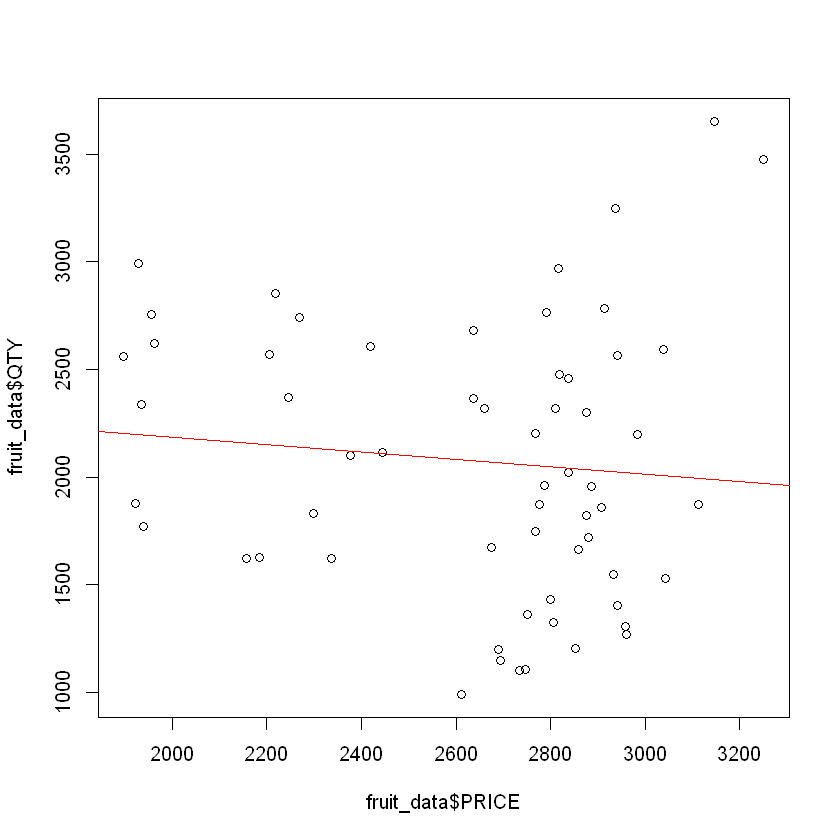

In [19]:
plot(fruit_data$PRICE, fruit_data$QTY)
abline(a, col = 2)

In [21]:
cor(fruit_data$RAIN_DAY, fruit_data$QTY)

[1] 0.4756766

In [22]:
a = lm(QTY ~ RAIN_DAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ RAIN_DAY, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-815.94 -441.85   -1.32  263.85 1790.09 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.802e+03  9.796e+01  18.390  < 2e-16 ***
RAIN_DAY    2.930e-02  7.115e-03   4.118 0.000123 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 559.2 on 58 degrees of freedom
Multiple R-squared:  0.2263,	Adjusted R-squared:  0.2129 
F-statistic: 16.96 on 1 and 58 DF,  p-value: 0.0001225


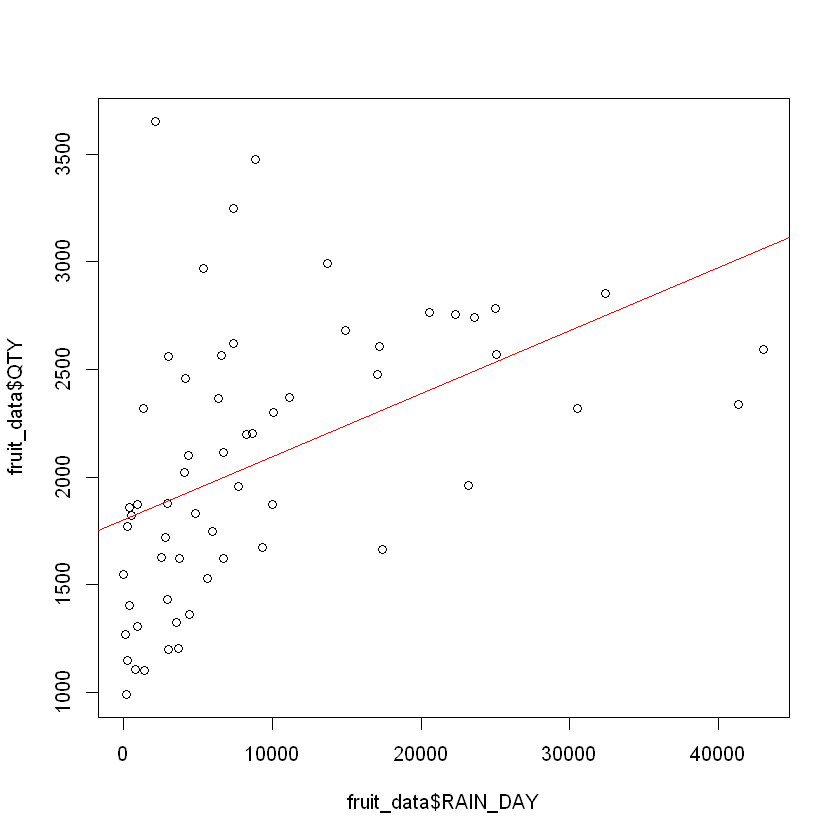

In [23]:
plot(fruit_data$RAIN_DAY, fruit_data$QTY)
abline(a, col = 2)

In [24]:
# 설명력이 0.01수준 달라짐
a = lm(QTY ~ ITEM_CNT + MAXTEMP + HOLIDAY, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP + HOLIDAY, data = fruit_data)

Residuals:
   Min     1Q Median     3Q    Max 
-631.6 -221.0   13.0  144.6  685.0 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1609.330    370.266  -4.346 5.89e-05 ***
ITEM_CNT       35.682      3.663   9.741 1.17e-13 ***
MAXTEMP        42.030      3.671  11.448 2.72e-16 ***
HOLIDAY        71.405     30.008   2.380   0.0208 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 273.4 on 56 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8119 
F-statistic: 85.88 on 3 and 56 DF,  p-value: < 2.2e-16


In [25]:
bartlett.test(QTY ~ as.factor(HOLIDAY), data = fruit_data)


	Bartlett test of homogeneity of variances

data:  QTY by as.factor(HOLIDAY)
Bartlett's K-squared = 4.7898, df = 4, p-value = 0.3096


In [26]:
a = aov(QTY ~ as.factor(HOLIDAY), data = fruit_data)
summary(a)

                   Df   Sum Sq Mean Sq F value Pr(>F)  
as.factor(HOLIDAY)  4  4900849 1225212   3.634 0.0107 *
Residuals          55 18541111  337111                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [27]:
TukeyHSD(a)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = QTY ~ as.factor(HOLIDAY), data = fruit_data)

$`as.factor(HOLIDAY)`
            diff         lwr        upr     p adj
9-8    163.10317  -420.42361  746.62996 0.9329426
10-8   714.65179   115.38157 1313.92201 0.0117936
11-8    29.08929  -696.66299  754.84156 0.9999619
12-8   143.21429  -785.17115 1071.59972 0.9923413
10-9   551.54861   -11.08969 1114.18691 0.0572624
11-9  -134.01389  -829.82523  561.79746 0.9823274
12-9   -19.88889  -925.06101  885.28323 0.9999965
11-10 -685.56250 -1394.62859   23.50359 0.0627195
12-10 -571.43750 -1486.83788  343.96288 0.4066145
12-11  114.12500  -888.64588 1116.89588 0.9976323


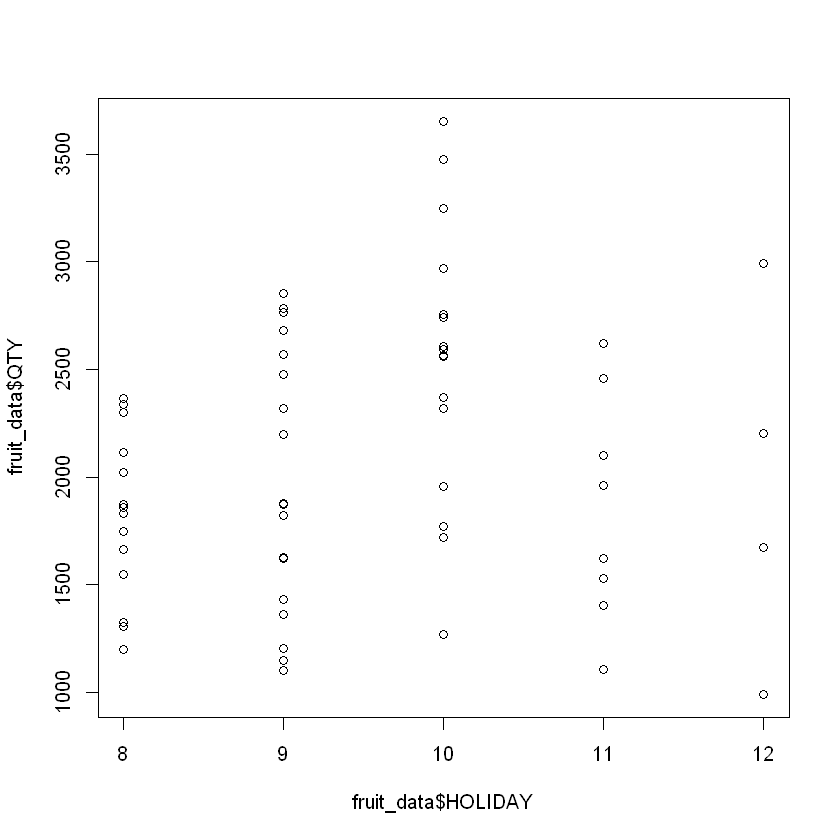

In [28]:
plot(fruit_data$HOLIDAY, fruit_data$QTY)

In [29]:
# 과즙음료 최종 모델
a = lm(QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-524.38 -163.69  -32.57  162.39  725.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -933.680    247.168  -3.778  0.00038 ***
ITEM_CNT      35.727      3.810   9.378 3.76e-13 ***
MAXTEMP       42.019      3.819  11.004 1.01e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 284.3 on 57 degrees of freedom
Multiple R-squared:  0.8034,	Adjusted R-squared:  0.7965 
F-statistic: 116.5 on 2 and 57 DF,  p-value: < 2.2e-16


In [30]:
vif(a)

ITEM_CNT  MAXTEMP 
1.010881 1.010881

### ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

### 차음료 모델 정의 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

In [171]:
a = lm(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + 
    RAIN_DAY + HOLIDAY, data = tea_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-457.24 -129.62  -14.93   94.56  848.92 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.185e+03  1.623e+05   0.057 0.955072    
YM          -4.607e-02  8.087e-01  -0.057 0.954792    
ITEM_CNT    -2.502e+01  1.371e+01  -1.825 0.073688 .  
PRICE        4.045e-01  4.594e-01   0.881 0.382618    
MAXTEMP      5.027e+01  4.375e+00  11.490 6.92e-16 ***
SALEDAY      1.083e-02  3.013e-03   3.595 0.000721 ***
RAIN_DAY    -5.743e-03  4.113e-03  -1.396 0.168558    
HOLIDAY      2.628e+01  2.539e+01   1.035 0.305389    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 226.6 on 52 degrees of freedom
Multiple R-squared:  0.8934,	Adjusted R-squared:  0.879 
F-statistic: 62.25 on 7 and 52 DF,  p-value: < 2.2e-16


In [173]:
b = step(a, direction = 'both', trace = F)
summary(b)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP + SALEDAY + RAIN_DAY, data = tea_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-439.01 -153.19  -10.17  111.11  847.70 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 407.001584 435.740293   0.934    0.354    
ITEM_CNT    -19.839826  12.502835  -1.587    0.118    
MAXTEMP      50.176566   4.235722  11.846  < 2e-16 ***
SALEDAY       0.011402   0.001013  11.255 6.84e-16 ***
RAIN_DAY     -0.006452   0.004013  -1.608    0.114    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 224.4 on 55 degrees of freedom
Multiple R-squared:  0.8895,	Adjusted R-squared:  0.8814 
F-statistic: 110.7 on 4 and 55 DF,  p-value: < 2.2e-16


In [174]:
cor.test(tea_data$ITEM_CNT, tea_data$QTY)


	Pearson's product-moment correlation

data:  tea_data$ITEM_CNT and tea_data$QTY
t = 5.289, df = 58, p-value = 1.955e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3700923 0.7200444
sample estimates:
      cor 
0.5704122 


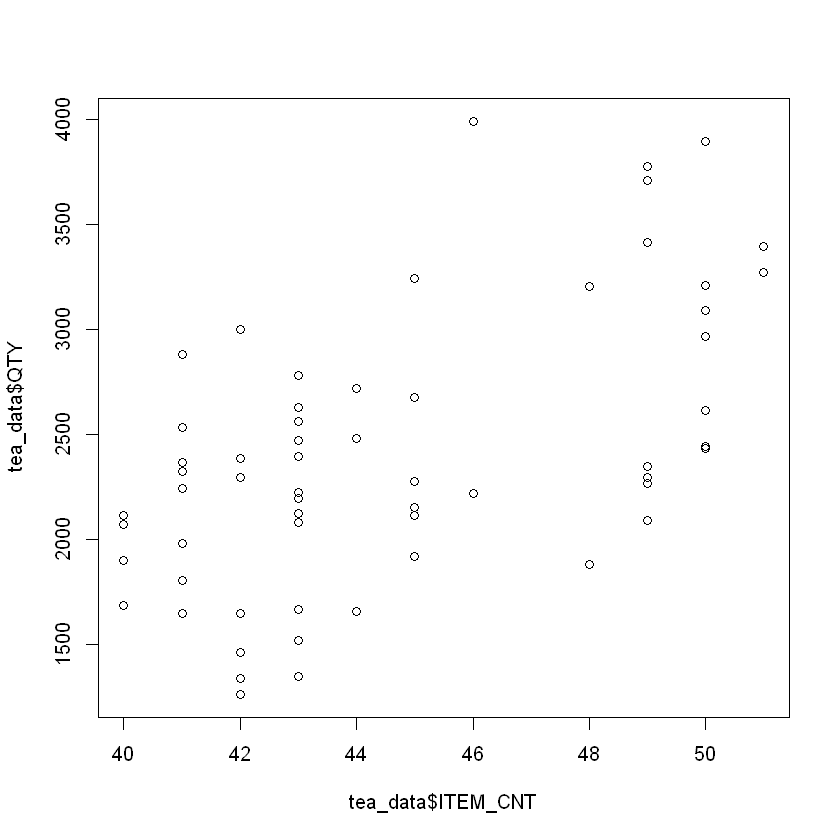

In [175]:
plot(tea_data$ITEM_CNT, tea_data$QTY)

In [100]:
a = lm(QTY ~ MAXTEMP + SALEDAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ MAXTEMP + SALEDAY, data = tea_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-436.25 -138.38   -2.52  102.12  957.39 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.705e+02  1.409e+02   -1.21    0.231    
MAXTEMP      4.407e+01  3.078e+00   14.32   <2e-16 ***
SALEDAY      9.957e-03  7.054e-04   14.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.4 on 57 degrees of freedom
Multiple R-squared:  0.8793,	Adjusted R-squared:  0.875 
F-statistic: 207.6 on 2 and 57 DF,  p-value: < 2.2e-16


In [101]:
vif(a)

MAXTEMP  SALEDAY 
1.000684 1.000684

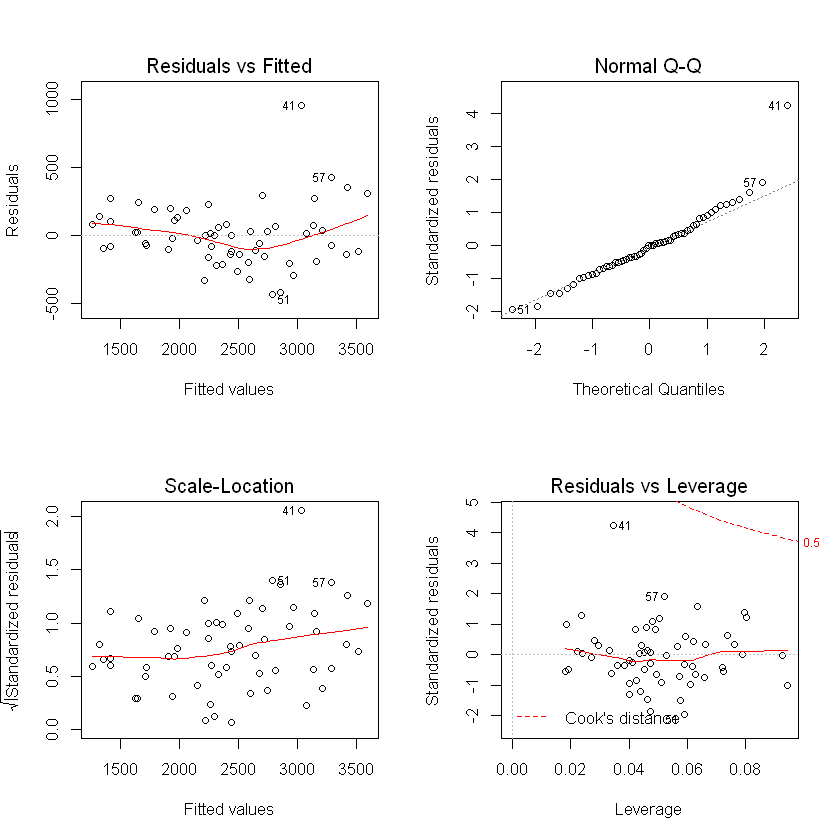

In [39]:
par(mfrow = c(2,2))
plot(a)

In [176]:
cor.test(tea_data$SALEDAY, tea_data$QTY)


	Pearson's product-moment correlation

data:  tea_data$SALEDAY and tea_data$QTY
t = 6.8191, df = 58, p-value = 5.896e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4973915 0.7875857
sample estimates:
      cor 
0.6670658 


In [41]:
a = lm(QTY ~ SALEDAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ SALEDAY, data = tea_data)

Residuals:
   Min     1Q Median     3Q    Max 
-923.2 -438.4  138.2  315.9 1232.7 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.550e+02  2.794e+02   1.986   0.0517 .  
SALEDAY     1.022e-02  1.499e-03   6.819  5.9e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 489.6 on 58 degrees of freedom
Multiple R-squared:  0.445,	Adjusted R-squared:  0.4354 
F-statistic:  46.5 on 1 and 58 DF,  p-value: 5.896e-09


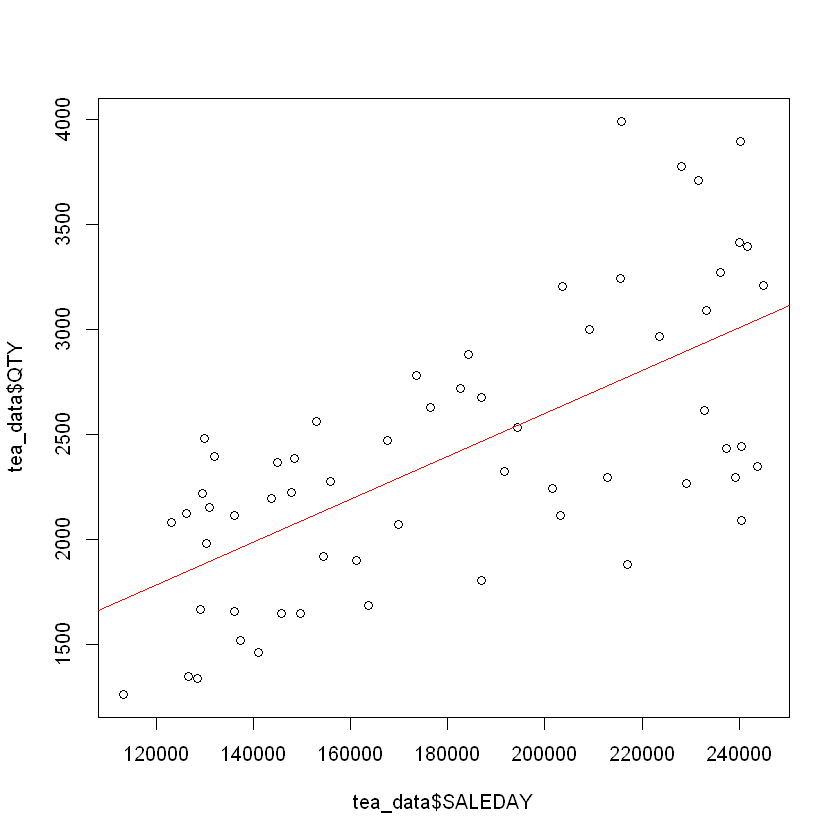

In [42]:
plot(tea_data$SALEDAY, tea_data$QTY)
abline(a, col = 2)

In [43]:
# 차음료 최종 모델
a = lm(QTY ~ MAXTEMP + SALEDAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ MAXTEMP + SALEDAY, data = tea_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-436.25 -138.38   -2.52  102.12  957.39 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.705e+02  1.409e+02   -1.21    0.231    
MAXTEMP      4.407e+01  3.078e+00   14.32   <2e-16 ***
SALEDAY      9.957e-03  7.054e-04   14.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.4 on 57 degrees of freedom
Multiple R-squared:  0.8793,	Adjusted R-squared:  0.875 
F-statistic: 207.6 on 2 and 57 DF,  p-value: < 2.2e-16


# ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

# 비타민 음료 모델 정의

In [177]:
a = lm(QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY, data = vitamin_data)
summary(a)


Call:
lm(formula = QTY ~ YM + ITEM_CNT + PRICE + MAXTEMP + SALEDAY + 
    RAIN_DAY + HOLIDAY, data = vitamin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-444.76 -126.81  -18.54   84.24  548.49 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.976e+05  2.055e+05   1.448  0.15351   
YM          -1.489e+00  1.024e+00  -1.454  0.15184   
ITEM_CNT     3.434e+01  1.943e+01   1.768  0.08298 . 
PRICE        7.542e-01  2.565e-01   2.940  0.00488 **
MAXTEMP      7.439e+00  3.967e+00   1.875  0.06635 . 
SALEDAY      3.025e-03  2.406e-03   1.257  0.21432   
RAIN_DAY     7.043e-03  3.734e-03   1.886  0.06485 . 
HOLIDAY      1.191e+01  2.278e+01   0.523  0.60345   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 203.7 on 52 degrees of freedom
Multiple R-squared:  0.7383,	Adjusted R-squared:  0.7031 
F-statistic: 20.96 on 7 and 52 DF,  p-value: 4.303e-13


In [179]:
b = step(a, direction = 'both', trace = F)
summary(b)


Call:
lm(formula = QTY ~ ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY, data = vitamin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-422.62 -112.66  -43.05  107.77  574.78 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.054e+03  3.653e+02  -2.885  0.00558 **
ITEM_CNT     2.246e+01  8.909e+00   2.521  0.01462 * 
PRICE        6.854e-01  2.487e-01   2.756  0.00792 **
MAXTEMP      8.875e+00  3.825e+00   2.320  0.02406 * 
RAIN_DAY     6.731e-03  3.692e-03   1.823  0.07374 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 202.9 on 55 degrees of freedom
Multiple R-squared:  0.7254,	Adjusted R-squared:  0.7054 
F-statistic: 36.31 on 4 and 55 DF,  p-value: 7.716e-15


In [180]:
a = lm(QTY ~ ITEM_CNT + PRICE + MAXTEMP, vitamin_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + PRICE + MAXTEMP, data = vitamin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-443.02 -114.74  -45.85  131.54  592.32 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1188.2848   365.0736  -3.255  0.00193 ** 
ITEM_CNT       23.0316     9.0860   2.535  0.01407 *  
PRICE           0.7479     0.2514   2.975  0.00432 ** 
MAXTEMP        13.6824     2.8273   4.839 1.06e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207.1 on 56 degrees of freedom
Multiple R-squared:  0.7088,	Adjusted R-squared:  0.6932 
F-statistic: 45.43 on 3 and 56 DF,  p-value: 5.119e-15


In [47]:
a = lm(QTY ~ ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY, vitamin_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + PRICE + MAXTEMP + RAIN_DAY, data = vitamin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-422.62 -112.66  -43.05  107.77  574.78 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.054e+03  3.653e+02  -2.885  0.00558 **
ITEM_CNT     2.246e+01  8.909e+00   2.521  0.01462 * 
PRICE        6.854e-01  2.487e-01   2.756  0.00792 **
MAXTEMP      8.875e+00  3.825e+00   2.320  0.02406 * 
RAIN_DAY     6.731e-03  3.692e-03   1.823  0.07374 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 202.9 on 55 degrees of freedom
Multiple R-squared:  0.7254,	Adjusted R-squared:  0.7054 
F-statistic: 36.31 on 4 and 55 DF,  p-value: 7.716e-15


In [48]:
a = lm(QTY ~ ITEM_CNT + PRICE + MAXTEMP, vitamin_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + PRICE + MAXTEMP, data = vitamin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-443.02 -114.74  -45.85  131.54  592.32 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1188.2848   365.0736  -3.255  0.00193 ** 
ITEM_CNT       23.0316     9.0860   2.535  0.01407 *  
PRICE           0.7479     0.2514   2.975  0.00432 ** 
MAXTEMP        13.6824     2.8273   4.839 1.06e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207.1 on 56 degrees of freedom
Multiple R-squared:  0.7088,	Adjusted R-squared:  0.6932 
F-statistic: 45.43 on 3 and 56 DF,  p-value: 5.119e-15


In [181]:
cor.test(vitamin_data$PRICE, vitamin_data$QTY)


	Pearson's product-moment correlation

data:  vitamin_data$PRICE and vitamin_data$QTY
t = 7.9254, df = 58, p-value = 8.17e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5718220 0.8240903
sample estimates:
      cor 
0.7210504 


In [105]:
a = lm(QTY ~ PRICE, vitamin_data)
summary(a)


Call:
lm(formula = QTY ~ PRICE, data = vitamin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-510.73 -179.44    1.86   82.30  881.14 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1596.0629   275.6055  -5.791 3.00e-07 ***
PRICE           1.2671     0.1599   7.925 8.17e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 261.2 on 58 degrees of freedom
Multiple R-squared:  0.5199,	Adjusted R-squared:  0.5116 
F-statistic: 62.81 on 1 and 58 DF,  p-value: 8.17e-11


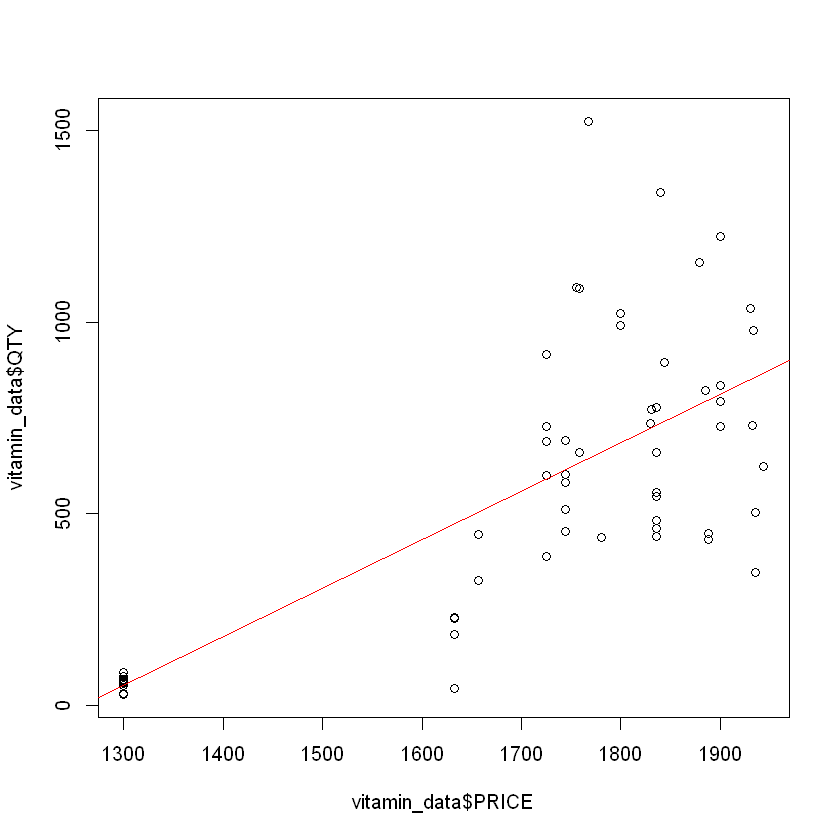

In [107]:
plot(vitamin_data$PRICE, vitamin_data$QTY)
abline(a, col = 2)

In [52]:
vitamin_data

X,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
61,200901,비타민음료,1,27,1300,4,126753,151,12
62,200902,비타민음료,2,29,1300,9,113399,3014,8
63,200903,비타민음료,2,67,1300,12,129162,1383,9
64,200904,비타민음료,2,60,1300,19,126277,3564,8
65,200905,비타민음료,2,74,1300,25,129584,9288,12
66,200906,비타민음료,2,84,1300,27,123218,9998,8
67,200907,비타민음료,2,61,1300,28,131083,17405,8
68,200908,비타민음료,2,63,1300,29,130040,7704,10
69,200909,비타민음료,2,56,1300,27,131989,4096,8
70,200910,비타민음료,2,50,1300,22,136095,2824,10


In [53]:
vitamin_data_new = vitamin_data %>%
    filter(PRICE != '1300')

In [54]:
a = lm(QTY ~ ITEM_CNT + PRICE + MAXTEMP, vitamin_data_new)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + PRICE + MAXTEMP, data = vitamin_data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-369.03 -145.86  -42.01  187.27  443.93 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 466.6399   904.6961   0.516  0.60852    
ITEM_CNT     33.3261    10.8076   3.084  0.00349 ** 
PRICE        -0.2581     0.5557  -0.465  0.64449    
MAXTEMP      16.0747     3.1519   5.100 6.59e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 213.7 on 45 degrees of freedom
Multiple R-squared:  0.5569,	Adjusted R-squared:  0.5274 
F-statistic: 18.86 on 3 and 45 DF,  p-value: 4.584e-08


In [182]:
cor.test(vitamin_data_new$PRICE, vitamin_data_new$QTY)


	Pearson's product-moment correlation

data:  vitamin_data_new$PRICE and vitamin_data_new$QTY
t = 2.8563, df = 47, p-value = 0.006363
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1159304 0.6008113
sample estimates:
      cor 
0.3845897 


In [56]:
a = lm(QTY ~ PRICE, vitamin_data_new)
summary(a)


Call:
lm(formula = QTY ~ PRICE, data = vitamin_data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-516.55 -219.36  -23.44  143.09  883.76 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1687.4818   832.6529  -2.027  0.04839 * 
PRICE           1.3173     0.4612   2.856  0.00636 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 290 on 47 degrees of freedom
Multiple R-squared:  0.1479,	Adjusted R-squared:  0.1298 
F-statistic: 8.158 on 1 and 47 DF,  p-value: 0.006363


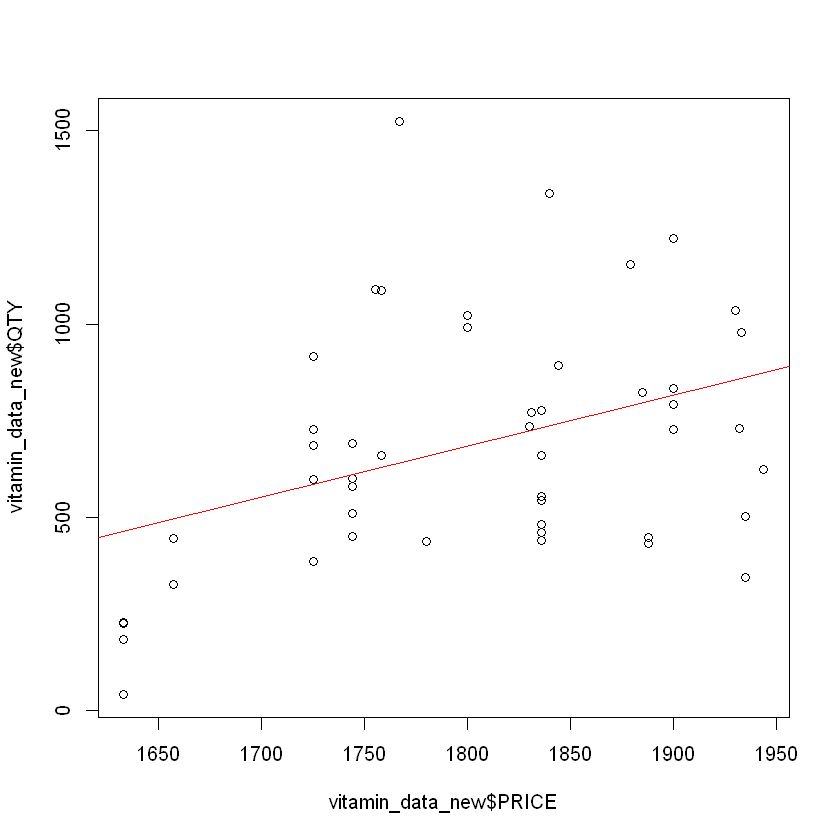

In [57]:
plot(vitamin_data_new$PRICE, vitamin_data_new$QTY)
abline(a, col = 2)

In [104]:
a = lm(QTY ~ ITEM_CNT + MAXTEMP, vitamin_data_new)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP, data = vitamin_data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-371.83 -152.35  -31.18  193.39  487.03 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   48.652     93.642   0.520    0.606    
ITEM_CNT      29.370      6.599   4.451 5.40e-05 ***
MAXTEMP       16.154      3.120   5.177 4.84e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 211.9 on 46 degrees of freedom
Multiple R-squared:  0.5548,	Adjusted R-squared:  0.5355 
F-statistic: 28.66 on 2 and 46 DF,  p-value: 8.251e-09


In [183]:
cor.test(vitamin_data$ITEM_CNT, vitamin_data$QTY)


	Pearson's product-moment correlation

data:  vitamin_data$ITEM_CNT and vitamin_data$QTY
t = 8.6771, df = 58, p-value = 4.541e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6150217 0.8443584
sample estimates:
      cor 
0.7515737 


In [60]:
a = lm(QTY ~ ITEM_CNT, vitamin_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT, data = vitamin_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-682.90 -122.66  -48.14  104.46  548.48 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   74.376     65.705   1.132    0.262    
ITEM_CNT      47.676      5.495   8.677 4.54e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 248.7 on 58 degrees of freedom
Multiple R-squared:  0.5649,	Adjusted R-squared:  0.5574 
F-statistic: 75.29 on 1 and 58 DF,  p-value: 4.541e-12


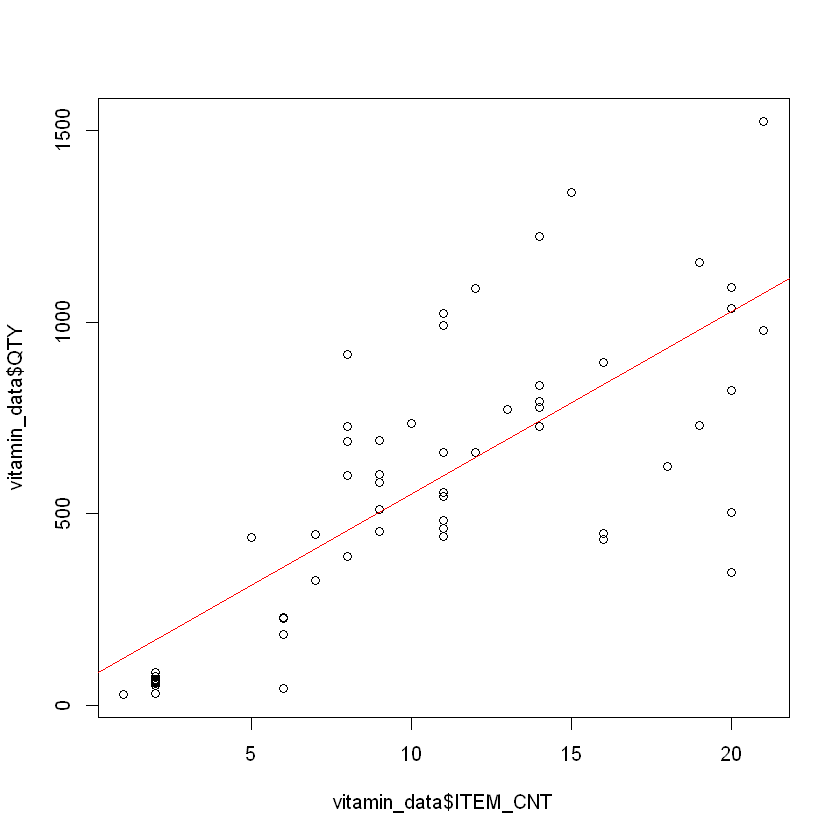

In [61]:
plot(vitamin_data$ITEM_CNT, vitamin_data$QTY)
abline(a, col = 2)

In [62]:
# 비타민 최종 모델
a = lm(QTY ~ ITEM_CNT + MAXTEMP, vitamin_data_new)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP, data = vitamin_data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-371.83 -152.35  -31.18  193.39  487.03 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   48.652     93.642   0.520    0.606    
ITEM_CNT      29.370      6.599   4.451 5.40e-05 ***
MAXTEMP       16.154      3.120   5.177 4.84e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 211.9 on 46 degrees of freedom
Multiple R-squared:  0.5548,	Adjusted R-squared:  0.5355 
F-statistic: 28.66 on 2 and 46 DF,  p-value: 8.251e-09


## ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

# 모델 정리

In [63]:
# 과즙음료 최종 모델
a = lm(QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP, data = fruit_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-524.38 -163.69  -32.57  162.39  725.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -933.680    247.168  -3.778  0.00038 ***
ITEM_CNT      35.727      3.810   9.378 3.76e-13 ***
MAXTEMP       42.019      3.819  11.004 1.01e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 284.3 on 57 degrees of freedom
Multiple R-squared:  0.8034,	Adjusted R-squared:  0.7965 
F-statistic: 116.5 on 2 and 57 DF,  p-value: < 2.2e-16


In [64]:
# 차음료 최종 모델
a = lm(QTY ~ MAXTEMP + SALEDAY, data = tea_data)
summary(a)


Call:
lm(formula = QTY ~ MAXTEMP + SALEDAY, data = tea_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-436.25 -138.38   -2.52  102.12  957.39 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.705e+02  1.409e+02   -1.21    0.231    
MAXTEMP      4.407e+01  3.078e+00   14.32   <2e-16 ***
SALEDAY      9.957e-03  7.054e-04   14.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.4 on 57 degrees of freedom
Multiple R-squared:  0.8793,	Adjusted R-squared:  0.875 
F-statistic: 207.6 on 2 and 57 DF,  p-value: < 2.2e-16


In [65]:
# 비타민 최종 모델
a = lm(QTY ~ ITEM_CNT + MAXTEMP, vitamin_data_new)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP, data = vitamin_data_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-371.83 -152.35  -31.18  193.39  487.03 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   48.652     93.642   0.520    0.606    
ITEM_CNT      29.370      6.599   4.451 5.40e-05 ***
MAXTEMP       16.154      3.120   5.177 4.84e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 211.9 on 46 degrees of freedom
Multiple R-squared:  0.5548,	Adjusted R-squared:  0.5355 
F-statistic: 28.66 on 2 and 46 DF,  p-value: 8.251e-09


In [185]:
fruit_data_2009 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2009', YM))
fruit_data_2010 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2010', YM))
fruit_data_2011 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2011', YM))
fruit_data_2012 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2012', YM))
fruit_data_2013 = fruit_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2013', YM))

fruit_data_2009

YM,MAXTEMP,QTY
200901,4,990
200902,9,1199
200903,12,1102
200904,19,1326
200905,25,1672
200906,27,1875
200907,28,1663
200908,29,1957
200909,27,2021
200910,22,1718


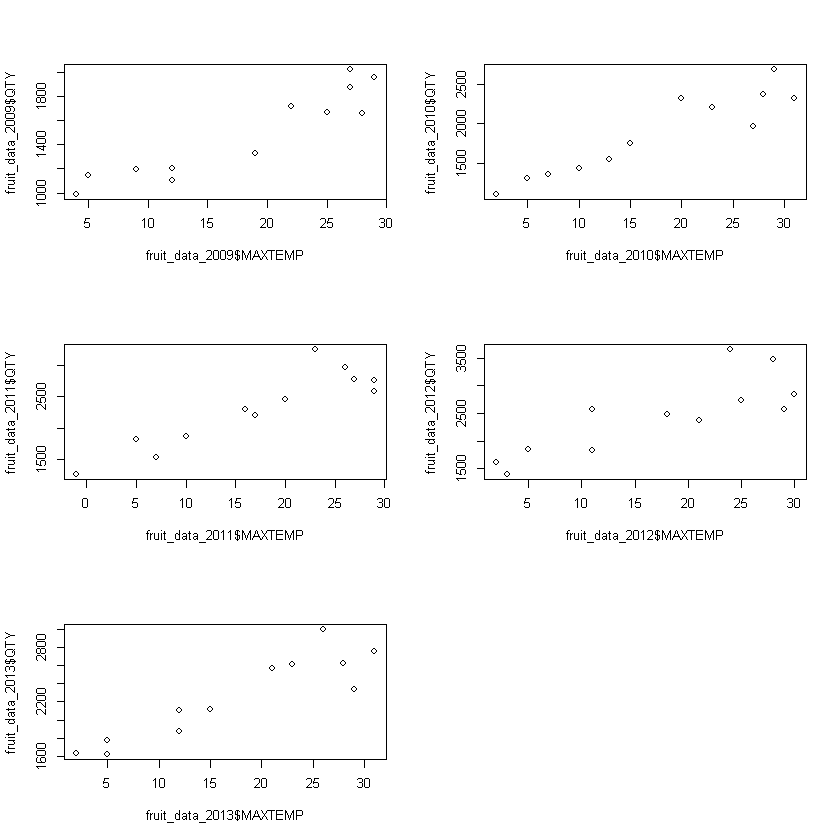

In [67]:
par(mfrow = c(3,2))
plot(fruit_data_2009$MAXTEMP, fruit_data_2009$QTY)
plot(fruit_data_2010$MAXTEMP, fruit_data_2010$QTY)
plot(fruit_data_2011$MAXTEMP, fruit_data_2011$QTY)
plot(fruit_data_2012$MAXTEMP, fruit_data_2012$QTY)
plot(fruit_data_2013$MAXTEMP, fruit_data_2013$QTY)

In [68]:
vitamin_data_2009 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2009', YM))
vitamin_data_2010 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2010', YM))
vitamin_data_2011 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2011', YM))
vitamin_data_2012 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2012', YM))
vitamin_data_2013 = vitamin_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2013', YM))

vitamin_data_2009$YM = seq(1:12)
vitamin_data_2010$YM = seq(1:12)
vitamin_data_2011$YM = seq(1:12)
vitamin_data_2012$YM = seq(1:12)
vitamin_data_2013$YM = seq(1:12)

vitamin_data_t = data.frame(vitamin_data_2009$YM, vitamin_data_2009$MAXTEMP)
vitamin_data_t = cbind(vitamin_data_t, vitamin_data_2010$MAXTEMP, vitamin_data_2011$MAXTEMP, vitamin_data_2012$MAXTEMP,
                       vitamin_data_2013$MAXTEMP)
vitamin_data_t$t_mean = apply(vitamin_data_t[-c(1)], 1, mean)

vitamin_data_ = data.frame(vitamin_data_2009$YM, vitamin_data_2009$QTY)
vitamin_data_ = cbind(vitamin_data_, vitamin_data_2010$QTY, vitamin_data_2011$QTY, vitamin_data_2012$QTY, vitamin_data_2013$QTY)

vitamin_data_$mean = apply(vitamin_data_[-c(1)], 1, mean)
vitamin_data_ = cbind(vitamin_data_, vitamin_data_t$t_mean)
colnames(vitamin_data_) = c('M', 'y09', 'y10', 'y11', 'y12', 'y13', 'QTY_mean', 'Temp_mean')

vitamin_data_

M,y09,y10,y11,y12,y13,QTY_mean,Temp_mean
1,27,226,581,481,432,349.4,2.0
2,29,185,691,441,447,358.6,6.6
3,67,229,452,545,623,383.2,11.0
4,60,326,511,659,1089,529.0,16.8
5,74,445,660,771,1524,694.8,23.6
6,84,438,1088,776,978,672.8,27.6
7,61,387,992,893,1036,673.8,28.8
8,63,599,1022,1338,1155,835.4,30.0
9,56,728,991,792,822,677.8,26.2
10,50,916,734,1222,730,730.4,20.8


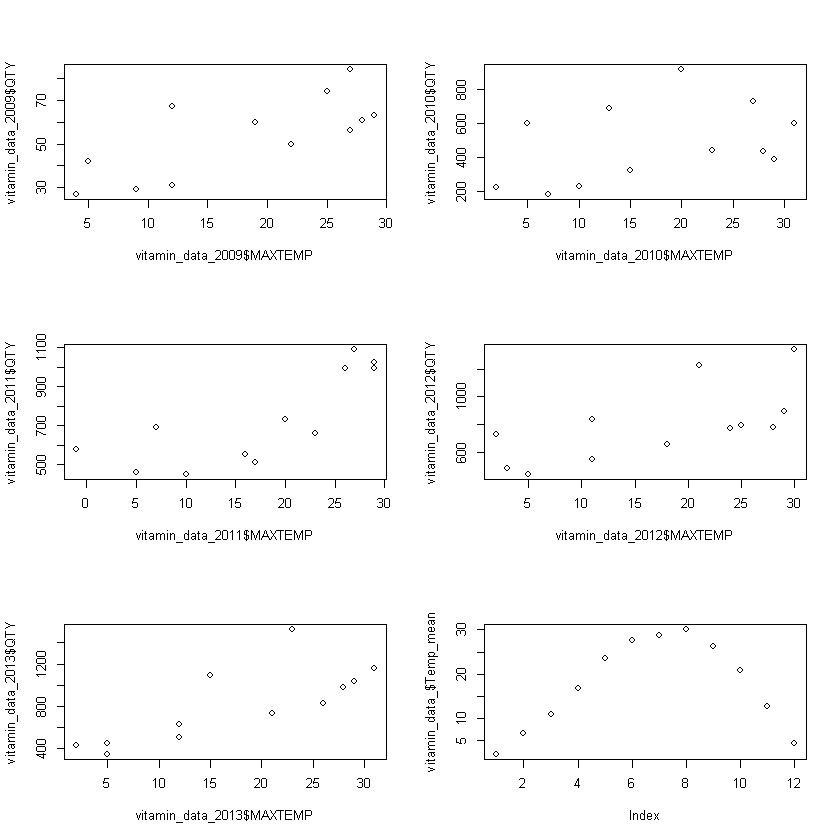

In [69]:
par(mfrow = c(3, 2))
plot(vitamin_data_2009$MAXTEMP, vitamin_data_2009$QTY)
plot(vitamin_data_2010$MAXTEMP, vitamin_data_2010$QTY)
plot(vitamin_data_2011$MAXTEMP, vitamin_data_2011$QTY)
plot(vitamin_data_2012$MAXTEMP, vitamin_data_2012$QTY)
plot(vitamin_data_2013$MAXTEMP, vitamin_data_2013$QTY)
plot(vitamin_data_$Temp_mean)

In [70]:
tea_data_2009 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2009', YM))
tea_data_2010 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2010', YM))
tea_data_2011 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2011', YM))
tea_data_2012 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2012', YM))
tea_data_2013 = tea_data %>%
                    select(YM, MAXTEMP, QTY) %>%
                    filter(grepl('^2013', YM))

tea_data_2009$YM = seq(1:12)
tea_data_2010$YM = seq(1:12)
tea_data_2011$YM = seq(1:12)
tea_data_2012$YM = seq(1:12)
tea_data_2013$YM = seq(1:12)

tea_data_t = data.frame(tea_data_2009$YM, tea_data_2009$MAXTEMP)
tea_data_t = cbind(tea_data_t, tea_data_2010$MAXTEMP, tea_data_2011$MAXTEMP, tea_data_2012$MAXTEMP, tea_data_2013$MAXTEMP)
tea_data_t$t_mean = apply(tea_data_t[-c(1)], 1, mean)

tea_data_ = data.frame(tea_data_2009$YM, tea_data_2009$QTY)
tea_data_ = cbind(tea_data_, tea_data_2010$QTY, tea_data_2011$QTY, tea_data_2012$QTY, tea_data_2013$QTY)

tea_data_$mean = apply(tea_data_[-c(1)], 1, mean)
tea_data_ = cbind(tea_data_, tea_data_t$t_mean)
colnames(tea_data_) = c('M', 'y09', 'y10', 'y11', 'y12', 'y13', 'QTY_mean', 'Temp_mean')

tea_data_

M,y09,y10,y11,y12,y13,QTY_mean,Temp_mean
1,1346,1463,1685,2115,2089,1739.6,2.0
2,1260,1336,1648,1804,1880,1585.6,6.6
3,1664,1645,2069,2297,2348,2004.6,11.0
4,2125,1979,2473,3001,2435,2402.6,16.8
5,2220,2193,2626,3992,3209,2848.0,23.6
6,2082,2366,2779,3243,3274,2748.8,27.6
7,2153,2385,2717,3206,3395,2771.2,28.8
8,2479,2561,2674,3778,3894,3077.2,30.0
9,2394,2222,2879,2965,3708,2833.6,26.2
10,2116,2276,2535,3090,3413,2686.0,20.8


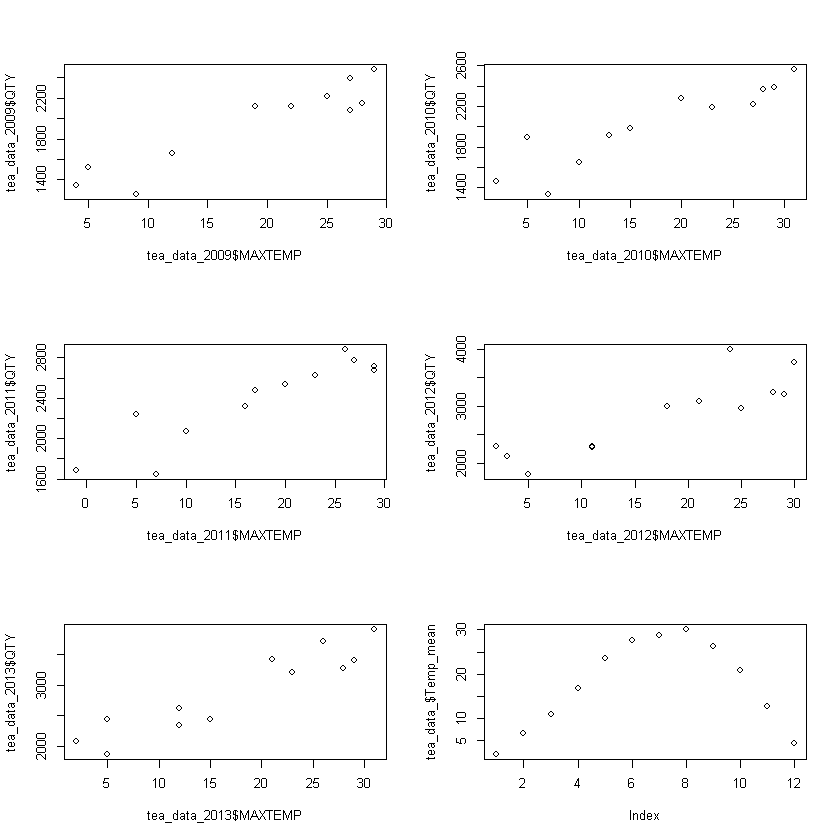

In [71]:
par(mfrow = c(3, 2))
plot(tea_data_2009$MAXTEMP, tea_data_2009$QTY)
plot(tea_data_2010$MAXTEMP, tea_data_2010$QTY)
plot(tea_data_2011$MAXTEMP, tea_data_2011$QTY)
plot(tea_data_2012$MAXTEMP, tea_data_2012$QTY)
plot(tea_data_2013$MAXTEMP, tea_data_2013$QTY)
plot(tea_data_$Temp_mean)

In [72]:
fruit_data_2009$YM = seq(1:12)
fruit_data_2010$YM = seq(1:12)
fruit_data_2011$YM = seq(1:12)
fruit_data_2012$YM = seq(1:12)
fruit_data_2013$YM = seq(1:12)

fruit_data_t = data.frame(fruit_data_2009$YM, fruit_data_2009$MAXTEMP)
fruit_data_t = cbind(fruit_data_t, fruit_data_2010$MAXTEMP, fruit_data_2011$MAXTEMP, fruit_data_2012$MAXTEMP, fruit_data_2013$MAXTEMP)
fruit_data_t$t_mean = apply(fruit_data_t[-c(1)], 1, mean)

fruit_data_ = data.frame(fruit_data_2009$YM, fruit_data_2009$QTY)
fruit_data_ = cbind(fruit_data_, fruit_data_2010$QTY, fruit_data_2011$QTY, fruit_data_2012$QTY, fruit_data_2013$QTY)

fruit_data_

fruit_data_2009.YM,fruit_data_2009.QTY,fruit_data_2010$QTY,fruit_data_2011$QTY,fruit_data_2012$QTY,fruit_data_2013$QTY
1,990,1106,1268,1402,1627
2,1199,1361,1528,1859,1624
3,1102,1432,1874,2566,2103
4,1326,1750,2200,2475,2117
5,1672,2204,3247,3653,2606
6,1875,2366,2783,3474,2621
7,1663,2681,2593,2568,2336
8,1957,2321,2765,2854,2755
9,2021,1963,2971,2744,2992
10,1718,2321,2459,2369,2563


In [73]:
fruit_data_$mean = apply(fruit_data_[-c(1)], 1, mean)
fruit_data_ = cbind(fruit_data_, fruit_data_t$t_mean)
colnames(fruit_data_) = c('M', 'y09', 'y10', 'y11', 'y12', 'y13', 'QTY_mean', 'Temp_mean')
fruit_data_

M,y09,y10,y11,y12,y13,QTY_mean,Temp_mean
1,990,1106,1268,1402,1627,1278.6,2.0
2,1199,1361,1528,1859,1624,1514.2,6.6
3,1102,1432,1874,2566,2103,1815.4,11.0
4,1326,1750,2200,2475,2117,1973.6,16.8
5,1672,2204,3247,3653,2606,2676.4,23.6
6,1875,2366,2783,3474,2621,2623.8,27.6
7,1663,2681,2593,2568,2336,2368.2,28.8
8,1957,2321,2765,2854,2755,2530.4,30.0
9,2021,1963,2971,2744,2992,2538.2,26.2
10,1718,2321,2459,2369,2563,2286.0,20.8


In [74]:
fruit_data_1 = fruit_data_[-c(2:6)]
fruit_data_1$group = 'fruit_temp'
vitamin_data_1 = vitamin_data_[-c(2:6)]
vitamin_data_1$group = 'vitamin_temp'
tea_data_1 = tea_data_[-c(2:6)]
tea_data_1$group = 'tea_temp'
data_month = rbind(fruit_data_1, vitamin_data_1, tea_data_1)
head(data_month)

M,QTY_mean,Temp_mean,group
1,1278.6,2.0,fruit_temp
2,1514.2,6.6,fruit_temp
3,1815.4,11.0,fruit_temp
4,1973.6,16.8,fruit_temp
5,2676.4,23.6,fruit_temp
6,2623.8,27.6,fruit_temp


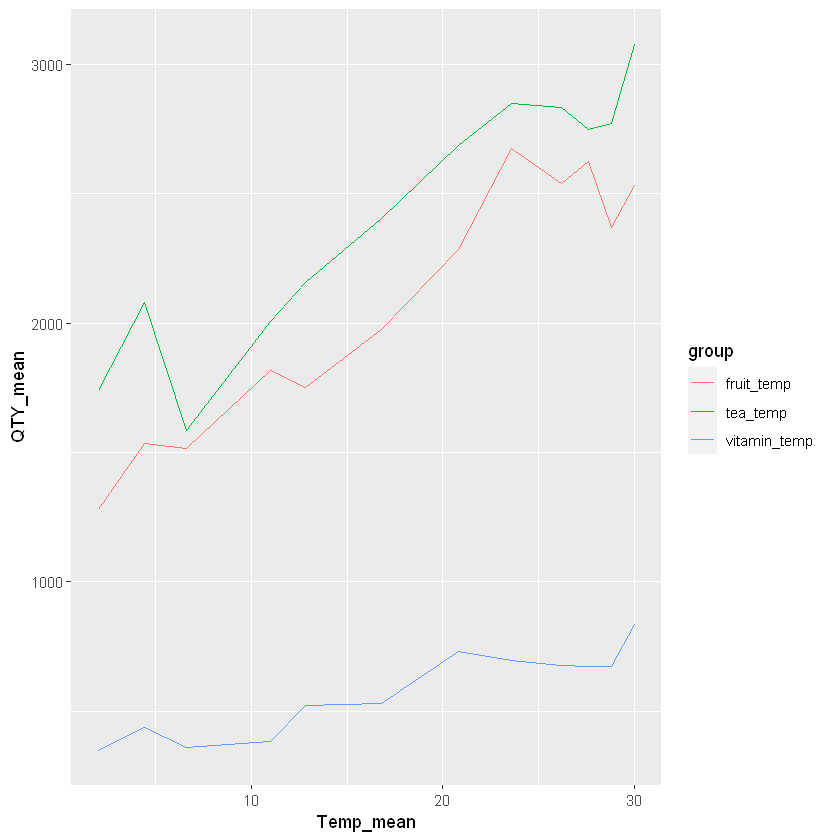

In [75]:
ggplot(data = data_month) +
    geom_line(aes(x = Temp_mean, y = QTY_mean, group = group, color = group), linetype = 1)

In [76]:
data_month = as.data.frame(data_month)
data_month$M = as.integer(data_month$M)
head(data_month)

M,QTY_mean,Temp_mean,group
1,1278.6,2.0,fruit_temp
2,1514.2,6.6,fruit_temp
3,1815.4,11.0,fruit_temp
4,1973.6,16.8,fruit_temp
5,2676.4,23.6,fruit_temp
6,2623.8,27.6,fruit_temp


In [77]:
data_month = data_month %>%
        mutate(season = ntile(data_month$Temp_mean, 4))

In [193]:
head(data_month)

M,QTY_mean,Temp_mean,group,season
1,1278.6,2.0,fruit_temp,1
2,1514.2,6.6,fruit_temp,1
3,1815.4,11.0,fruit_temp,2
4,1973.6,16.8,fruit_temp,2
5,2676.4,23.6,fruit_temp,3
6,2623.8,27.6,fruit_temp,4


In [78]:
data_month$season = as.factor(data_month$season)
str(data_month)

'data.frame':	36 obs. of  5 variables:
 $ M        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ QTY_mean : num  1279 1514 1815 1974 2676 ...
 $ Temp_mean: num  2 6.6 11 16.8 23.6 27.6 28.8 30 26.2 20.8 ...
 $ group    : chr  "fruit_temp" "fruit_temp" "fruit_temp" "fruit_temp" ...
 $ season   : Factor w/ 4 levels "1","2","3","4": 1 1 2 2 3 4 4 4 3 3 ...


In [79]:
a = aov(QTY_mean ~ season * group, data = data_month)
summary(a)

             Df   Sum Sq  Mean Sq F value   Pr(>F)    
season        3  4308384  1436128  68.037 7.04e-12 ***
group         2 23013922 11506961 545.142  < 2e-16 ***
season:group  6   724583   120764   5.721 0.000826 ***
Residuals    24   506597    21108                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [80]:
TukeyHSD(a)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = QTY_mean ~ season * group, data = data_month)

$season
         diff       lwr       upr     p adj
2-1 296.06667  107.1330  485.0003 0.0012457
3-1 788.62222  599.6885  977.5559 0.0000000
4-1 825.33333  636.3997 1014.2670 0.0000000
3-2 492.55556  303.6219  681.4892 0.0000011
4-2 529.26667  340.3330  718.2003 0.0000003
4-3  36.71111 -152.2226  225.6448 0.9493752

$group
                              diff        lwr        upr    p adj
tea_temp-fruit_temp       336.8167   188.6951   484.9383 2.19e-05
vitamin_temp-fruit_temp -1502.4167 -1650.5383 -1354.2951 0.00e+00
vitamin_temp-tea_temp   -1839.2333 -1987.3549 -1691.1117 0.00e+00

$`season:group`
                                      diff         lwr        upr     p adj
2:fruit_temp-1:fruit_temp       405.066667   -22.65471   832.7880 0.0748781
3:fruit_temp-1:fruit_temp      1058.133333   630.41195  1485.8547 0.0000003
4:fruit_temp-1:fruit_temp

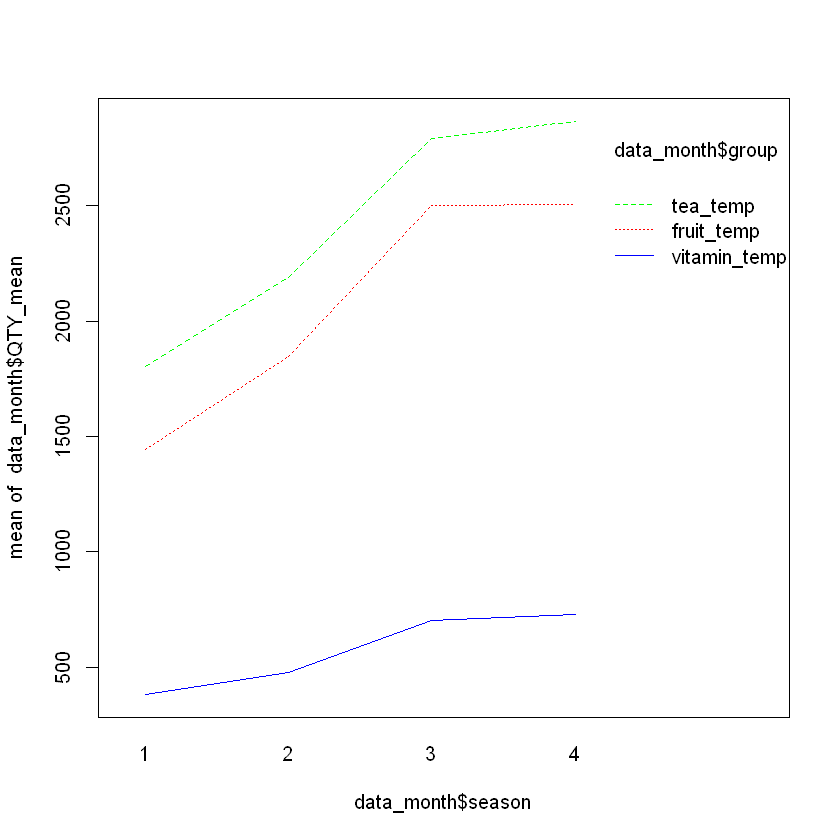

In [81]:
interaction.plot(data_month$season, data_month$group, data_month$QTY_mean, col = rainbow(3))

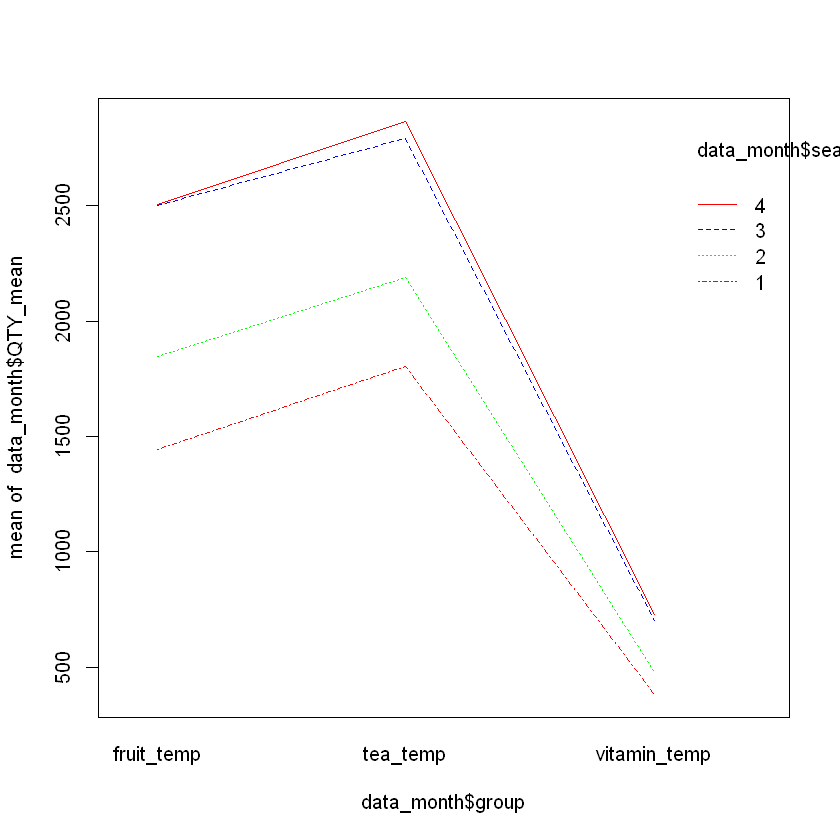

In [82]:
interaction.plot(data_month$group, data_month$season, data_month$QTY_mean, col = rainbow(3))

In [83]:
data_month

M,QTY_mean,Temp_mean,group,season
1,1278.6,2.0,fruit_temp,1
2,1514.2,6.6,fruit_temp,1
3,1815.4,11.0,fruit_temp,2
4,1973.6,16.8,fruit_temp,2
5,2676.4,23.6,fruit_temp,3
6,2623.8,27.6,fruit_temp,4
7,2368.2,28.8,fruit_temp,4
8,2530.4,30.0,fruit_temp,4
9,2538.2,26.2,fruit_temp,3
10,2286.0,20.8,fruit_temp,3


In [138]:
data_2013 = data  %>% 
                filter(grepl('^2013', YM))

data_2013_fruit = data_2013  %>% 
                    filter(CATEGORY == '과즙음료')
data_2013_vitamin = data_2013  %>% 
                        filter(CATEGORY == '비타민음료')
data_2013_tea = data_2013  %>% 
                    filter(CATEGORY == '차음료')

data_0912 = data  %>% 
                filter(!grepl('^2013', YM))

data_0912_fruit = data_0912  %>% 
                    filter(CATEGORY == '과즙음료')
data_0912_vitamin = data_0912  %>% 
                    filter(CATEGORY == '비타민음료')
data_0912_vitamin = data_0912_vitamin  %>% 
                    filter(PRICE != 1300)

data_0912_tea = data_0912  %>% 
                    filter(CATEGORY == '차음료')

In [139]:
# 과즙음료 최종 모델
fruit_model = lm(QTY ~ ITEM_CNT + MAXTEMP, data = data_0912_fruit)
summary(fruit_model)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP, data = data_0912_fruit)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.54 -173.22  -13.05  128.15  759.14 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1084.798    235.935  -4.598 3.46e-05 ***
ITEM_CNT       37.756      3.660  10.316 1.94e-13 ***
MAXTEMP        39.925      4.063   9.826 8.98e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 267 on 45 degrees of freedom
Multiple R-squared:  0.8444,	Adjusted R-squared:  0.8375 
F-statistic: 122.1 on 2 and 45 DF,  p-value: < 2.2e-16


In [140]:
# 차음료 최종 모델
tea_model = lm(QTY ~ MAXTEMP + SALEDAY, data = data_0912_tea)
summary(tea_model)


Call:
lm(formula = QTY ~ MAXTEMP + SALEDAY, data = data_0912_tea)

Residuals:
    Min      1Q  Median      3Q     Max 
-429.01 -117.56    2.35   73.97  920.63 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.428e+02  1.556e+02  -1.561    0.126    
MAXTEMP      4.017e+01  3.147e+00  12.765   <2e-16 ***
SALEDAY      1.090e-02  8.585e-04  12.692   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 209.7 on 45 degrees of freedom
Multiple R-squared:  0.8815,	Adjusted R-squared:  0.8762 
F-statistic: 167.3 on 2 and 45 DF,  p-value: < 2.2e-16


In [141]:
# 비타민 최종 모델
vitamin_model = lm(QTY ~ ITEM_CNT + MAXTEMP, data_0912_vitamin)
summary(vitamin_model)


Call:
lm(formula = QTY ~ ITEM_CNT + MAXTEMP, data = data_0912_vitamin)

Residuals:
    Min      1Q  Median      3Q     Max 
-268.01 -107.41  -54.55  159.06  363.94 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -168.348    107.900  -1.560 0.127970    
ITEM_CNT      61.455     10.378   5.922 1.09e-06 ***
MAXTEMP       11.439      2.979   3.840 0.000511 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 173 on 34 degrees of freedom
Multiple R-squared:  0.6611,	Adjusted R-squared:  0.6412 
F-statistic: 33.16 on 2 and 34 DF,  p-value: 1.026e-08


## 2013 과즙음료 예측

In [142]:
fruit_pre = as.data.frame(predict(fruit_model, data_2013_fruit, interval = 'predict'))
fruit_pre = cbind(fruit_pre, data_2013_fruit$QTY)
fruit_pre$acc[fruit_pre$'data_2013_fruit$QTY' >= fruit_pre$lwr & fruit_pre$'data_2013_fruit$QTY' <= fruit_pre$upr] = T
fruit_pre$acc[is.na(fruit_pre$acc)] = F
colnames(fruit_pre) = c('fit', 'lwr', 'upr', 'QTY', 'acc')
fruit_pre

fit,lwr,upr,QTY,acc
1373.666,815.7312,1931.600,1627,TRUE
1568.952,1015.5816,2122.322,1624,TRUE
1772.914,1227.6602,2318.168,2103,TRUE
1779.422,1235.0438,2323.799,2117,TRUE
2174.332,1628.7599,2719.904,2606,TRUE
2147.422,1592.7822,2702.061,2621,TRUE
2300.614,1747.0266,2854.201,2336,TRUE
2455.975,1900.4685,3011.482,2755,TRUE
2180.839,1631.1361,2730.542,2992,FALSE
2169.994,1625.8897,2714.098,2563,TRUE


In [143]:
round(sum(fruit_pre$acc) / dim(fruit_pre)[1], 2)

[1] 0.92

## 2013 차음료 예측

In [144]:
tea_pre = as.data.frame(predict(tea_model, data_2013_tea, interval = 'predict'))
tea_pre = cbind(tea_pre, data_2013_tea$QTY)
tea_pre$acc[tea_pre$'data_2013_tea$QTY' >= tea_pre$lwr & tea_pre$'data_2013_tea$QTY' <= tea_pre$upr] = T
tea_pre$acc[is.na(tea_pre$acc)] = F
colnames(tea_pre) = c('fit', 'lwr', 'upr', 'QTY', 'acc')
tea_pre

fit,lwr,upr,QTY,acc
2457.356,2000.805,2913.907,2089,TRUE
2322.853,1879.964,2765.742,1880,TRUE
2894.227,2446.027,3342.428,2348,FALSE
2945.985,2502.156,3389.815,2435,FALSE
3351.519,2903.325,3799.712,3209,TRUE
3455.493,3008.305,3902.681,3274,TRUE
3555.667,3104.991,4006.344,3395,TRUE
3619.162,3167.123,4071.201,3894,TRUE
3325.930,2882.313,3769.547,3708,TRUE
3215.755,2770.771,3660.739,3413,TRUE


In [145]:
round(sum(tea_pre$acc) / dim(tea_pre)[1], 2)

[1] 0.83

## 2013 비타민 음료 예측

In [146]:
vitamin_pre = as.data.frame(predict(vitamin_model, data_2013_vitamin, interval = 'predict'))
vitamin_pre = cbind(vitamin_pre, data_2013_vitamin$QTY)
vitamin_pre$acc[vitamin_pre$'data_2013_vitamin$QTY' >= vitamin_pre$lwr & vitamin_pre$'data_2013_vitamin$QTY' <= vitamin_pre$upr] = T
vitamin_pre$acc[is.na(vitamin_pre$acc)] = F
colnames(vitamin_pre) = c('fit', 'lwr', 'upr', 'QTY', 'acc')
vitamin_pre

fit,lwr,upr,QTY,acc
837.8060,442.3751,1233.237,432,FALSE
872.1218,481.9783,1262.265,447,FALSE
1075.1016,677.6437,1472.560,623,FALSE
1232.3270,818.0091,1646.645,1089,TRUE
1385.2906,965.3553,1805.226,1524,TRUE
1442.4836,1023.1879,1861.779,978,FALSE
1392.4675,983.1952,1801.740,1036,TRUE
1353.8899,953.0299,1754.750,1155,TRUE
1358.1516,949.2691,1767.034,822,FALSE
1239.5038,839.4351,1639.573,730,FALSE


In [147]:
round(sum(vitamin_pre$acc) / dim(vitamin_pre)[1], 2)

[1] 0.33

# 전체

In [148]:
pred = rbind(fruit_pre, vitamin_pre, tea_pre)
round(sum(pred$acc) / dim(pred)[1], 2)

[1] 0.69

# 전체 회귀분석

In [95]:
a = lm(QTY ~ ITEM_CNT + PRICE + MAXTEMP + SALEDAY, data_0912)
summary(a)


Call:
lm(formula = QTY ~ ITEM_CNT + PRICE + MAXTEMP + SALEDAY, data = data_0912)

Residuals:
    Min      1Q  Median      3Q     Max 
-874.00 -203.80   23.28  198.29 1328.68 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -89.345121 170.153881  -0.525      0.6    
ITEM_CNT     39.902972   1.537457  25.954  < 2e-16 ***
PRICE        -0.643810   0.056907 -11.313  < 2e-16 ***
MAXTEMP      27.486726   3.002391   9.155 6.23e-16 ***
SALEDAY       0.005507   0.000833   6.611 7.56e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 345.8 on 139 degrees of freedom
Multiple R-squared:  0.8739,	Adjusted R-squared:  0.8702 
F-statistic: 240.7 on 4 and 139 DF,  p-value: < 2.2e-16


In [96]:
cor(data_0912$PRICE, data_0912$QTY)

[1] 0.1904011

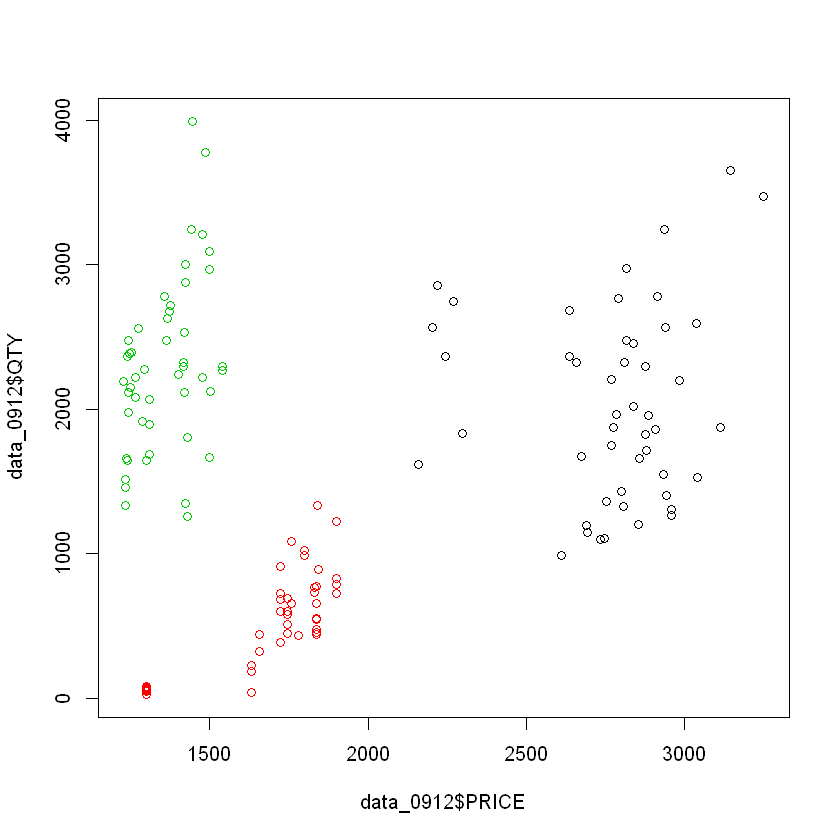

In [97]:
plot(data_0912$PRICE, data_0912$QTY, col = data_0912$CATEGORY)

In [98]:
pre = as.data.frame(predict(a, data_2013, interval = 'predict'))
pre = cbind(pre, data_2013$QTY)
pre$acc[pre$'data_2013$QTY' >= pre$lwr & pre$'data_2013$QTY' <= pre$upr] = T
pre$acc[is.na(pre$acc)] = F
pre

fit,lwr,upr,data_2013$QTY,acc
2397.4470,1693.348047,3101.546,1627,FALSE
2332.3370,1635.360411,3029.314,1624,FALSE
2566.5020,1867.463601,3265.540,2103,TRUE
2450.0912,1753.498735,3146.684,2117,TRUE
2809.0894,2110.129202,3508.050,2606,TRUE
2952.3785,2254.323911,3650.433,2621,TRUE
3146.6412,2446.179164,3847.103,2336,FALSE
3259.3920,2557.945628,3960.838,2755,TRUE
3014.1221,2317.363263,3710.881,2992,TRUE
3141.3318,2442.548128,3840.115,2563,TRUE


In [99]:
round(sum(pre$acc) / dim(pre)[1], 2)

[1] 0.81